# Titanic - Machine Learning from Disaster

An explanation of each field in the Titanic dataset:

PassengerId: Each passenger has a unique identifier assigned to them in this field.

Survived: This field indicates whether a passenger survived the sinking of the Titanic or not. It has two categories: 0 for not survived and 1 for survived.

Pclass: This field represents the passenger's class of travel on the Titanic. It is a proxy for socio-economic status and has three categories: 1 (first class), 2 (second class), and 3 (third class).

Name: The passenger's name is represented in this field.

Sex: This field indicates the gender of the passenger. It has two categories: male and female.

Age: The age of the passenger is provided in this field. It can be expressed as a fractional value for infants, or in whole numbers for older passengers.

SibSp: This field refers to the number of siblings or spouses traveling with a passenger. It is a categorical variable with three categories: 0 (no siblings or spouses), 1 (one sibling or spouse), and 2+ (two or more siblings or spouses).

Parch: This field represents the number of parents or children traveling with a passenger. It is a categorical variable with three categories: 0 (no parents or children), 1 (one parent or child), and 2+ (two or more parents or children).

Ticket: The ticket number of the passenger is provided in this field.

Fare: This field represents the fare or ticket price paid by the passenger.

Cabin: The cabin number of the passenger is provided in this field. It may contain missing values.

Embarked: This field indicates the port of embarkation for the passenger. It has three categories: C (Cherbourg), Q (Queenstown), and S (Southampton).

## Import Necessary Libraries

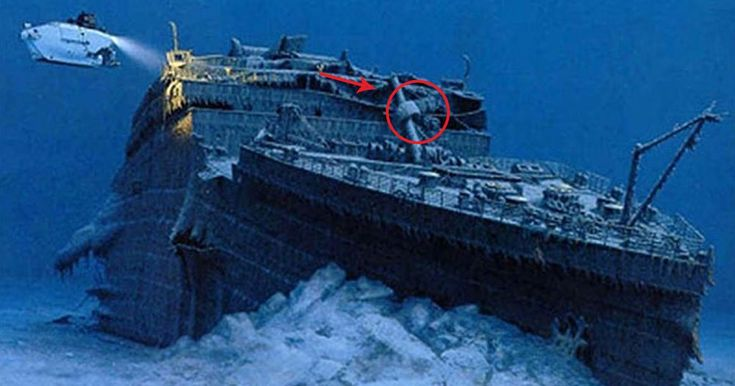

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from IPython.display import Image
Image("titanic.jpg")

## Load and Explore the Data

In [2]:
# Load the training and test datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv('test.csv')

In [3]:
# Display the first few rows of the training dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display the first few rows of the test dataset
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Check the shape of the datasets
print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Training data shape: (891, 12)
Test data shape: (418, 11)


In [6]:
# Check for missing values
print("Missing values in training data:\n",30*'-')
print(train_data.isnull().sum())

print("Missing values in test data:\n",30*'-')
print(test_data.isnull().sum())

Missing values in training data:
 ------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values in test data:
 ------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
# Get statistical summaries of the datasets
print("Summary of training data:")
print(train_data.describe())

print("\n \n Summary of test data:")
print(test_data.describe())


Summary of training data:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

 
 Summary of test data:
       PassengerId      Pclas

In [8]:
# Get datatype and count of the datasets
print("Summary of training data:")
print(train_data.info())

print("\n \n Summary of test data:")
print(test_data.info())

Summary of training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 
 Summary of test data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  ----- 

In [9]:
print(train_data['Sex'].value_counts(normalize=True))
print('='*30,'\n')
print(train_data['Embarked'].value_counts(normalize=True))

male      0.647587
female    0.352413
Name: Sex, dtype: float64

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64


In [10]:
# Replace missing values in the Age column with the average age
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

# Replace missing values in the Cabin column with 'Unknown'
train_data['Cabin'].fillna('Unknown', inplace=True)
test_data['Cabin'].fillna('Unknown', inplace=True)

# Replace missing values in the Embarked column with the most frequent value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Replace missing values in the Fare column with the average fare
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [11]:
# Check for missing values
print("Missing values in training data:")
print(train_data.isnull().sum())

print("Missing values in test data:")
print(test_data.isnull().sum())

Missing values in training data:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Missing values in test data:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [12]:
print("Summary of training data:")
print(train_data.describe())

print("Summary of test data:")
print(test_data.describe())

Summary of training data:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Summary of test data:
       PassengerId      Pclass   

## Exploratory Data Analysis (EDA)

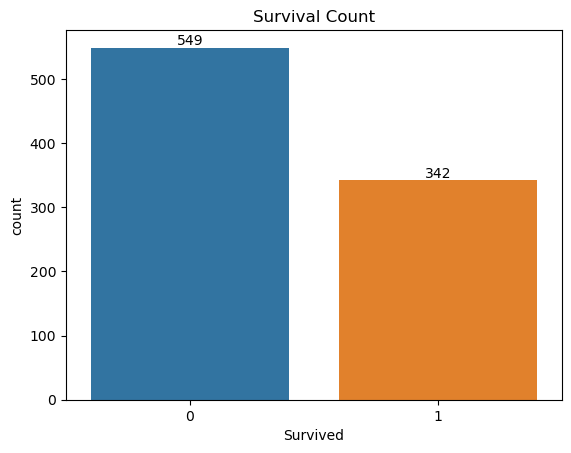

In [13]:
# Count the number of survivors
ax = sns.countplot(x='Survived', data=train_data)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Survival Count')
plt.show()

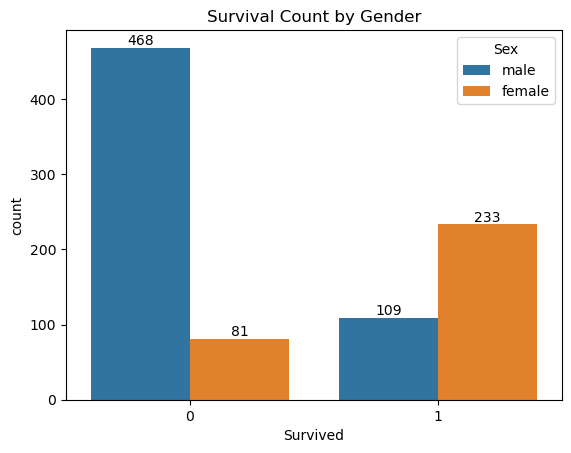

In [14]:
# Compare the survival rate by gender
ax=sns.countplot(x='Survived', hue='Sex', data=train_data)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Survival Count by Gender')
plt.show()

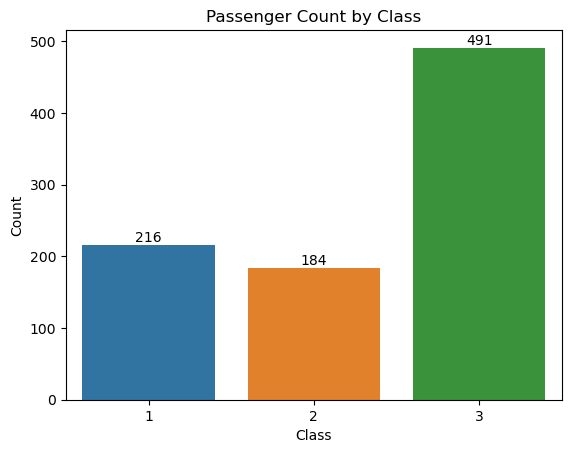

In [15]:
# Bar plot of the number of passengers by class
ax = sns.countplot(data=train_data, x='Pclass')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Passenger Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

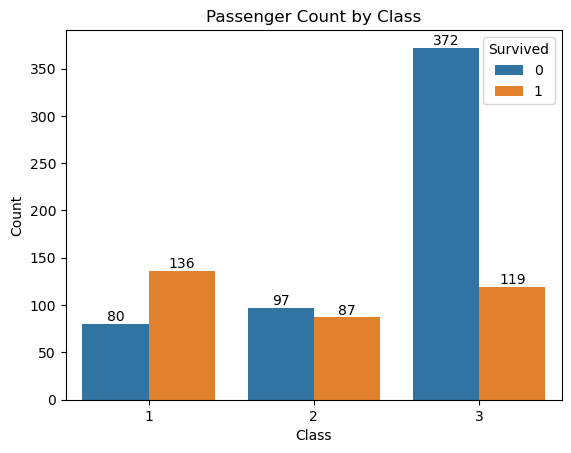

In [16]:
# Bar plot of the number of passengers by class
ax=sns.countplot(data=train_data, x='Pclass', hue='Survived')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Passenger Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

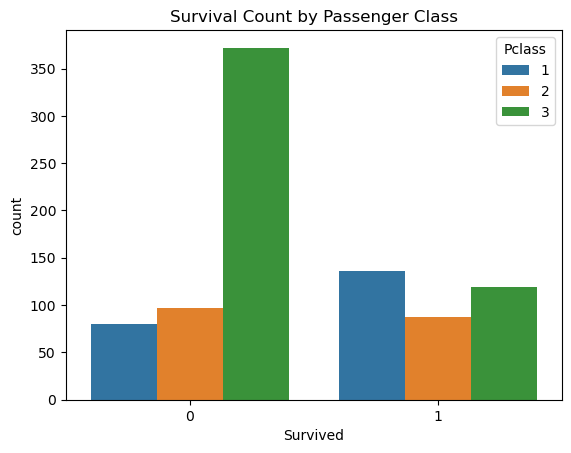

In [17]:
# Compare the survival rate by passenger class
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival Count by Passenger Class')
plt.show()

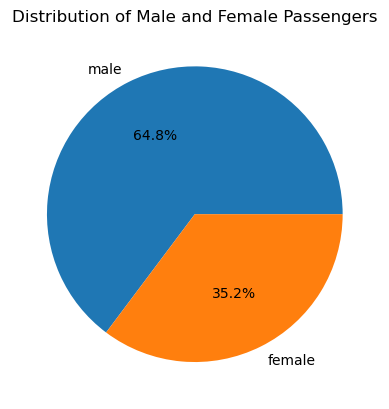

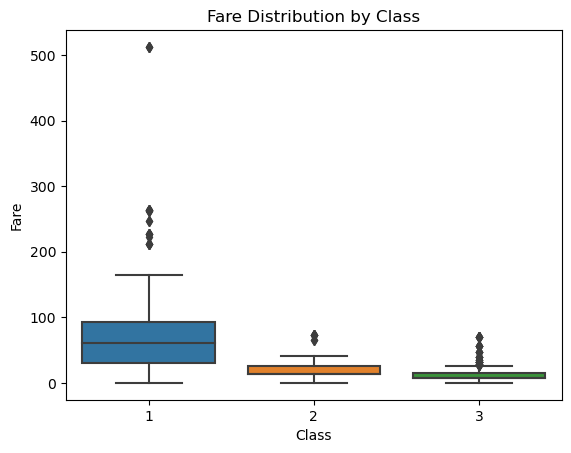

In [18]:
# Pie chart of the distribution of male and female passengers
gender_counts = train_data['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Male and Female Passengers')
plt.show()

# Box plot of the fare by passenger class
sns.boxplot(data=train_data, x='Pclass', y='Fare')
plt.title('Fare Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()




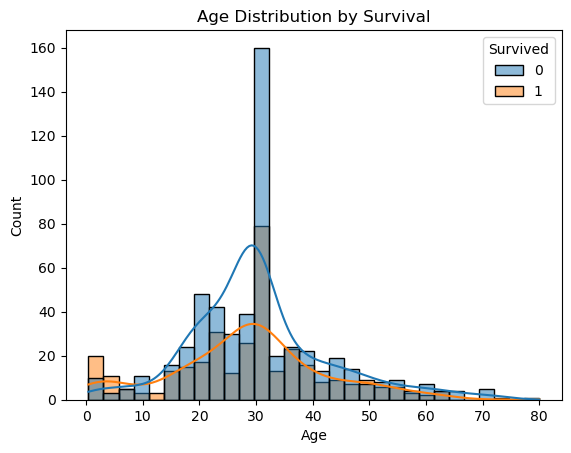

In [19]:
# Plot the distribution of age among survivors and non-survivors
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

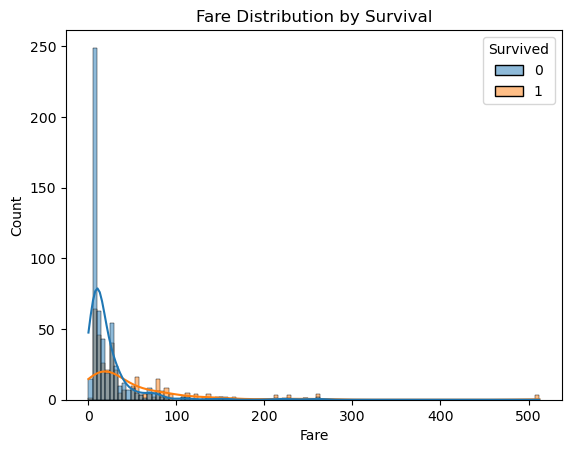

In [20]:
# Plot the fare distribution among survivors and non-survivors
sns.histplot(data=train_data, x='Fare', hue='Survived', kde=True)
plt.title('Fare Distribution by Survival')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6128\3721971018.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data.corr()


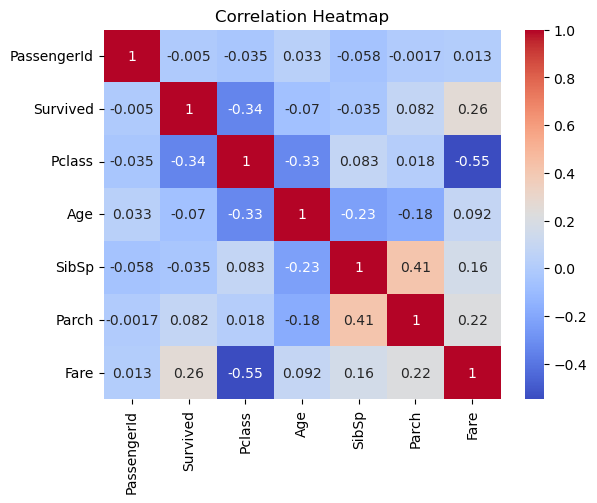

In [21]:
# Create a correlation heatmap
corr = train_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



## Feature Engineering

In [22]:
# Combine the SibSp and Parch columns to create a new feature 'FamilySize'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [23]:
# Extract the title from the 'Name' column and create a new feature 'Title'
train_data['Title'] = train_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test_data['Title'] = test_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [24]:
# Group rare titles into a single category 'Rare'
rare_titles = ['Rev', 'Dr', 'Major', 'Col', 'Capt']
train_data['Title'] = train_data['Title'].replace(rare_titles, 'Rare')
test_data['Title'] = test_data['Title'].replace(rare_titles, 'Rare')

In [25]:

# Perform one-hot encoding for categorical variables 'Sex', 'Embarked', and 'Title'
categorical_cols = ['Sex', 'Embarked', 'Title']
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

In [26]:
# Binning the 'Age' feature into different age groups
age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels)
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=age_bins, labels=age_labels)

In [27]:
# Perform one-hot encoding for the 'AgeGroup' feature
train_data = pd.get_dummies(train_data, columns=['AgeGroup'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['AgeGroup'], drop_first=True)

In [28]:
# Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age']
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

In [29]:
# Scale the 'Fare' feature using min-max scaling
fare_min = train_data['Fare'].min()
fare_max = train_data['Fare'].max()
train_data['Fare'] = (train_data['Fare'] - fare_min) / (fare_max - fare_min)
test_data['Fare'] = (test_data['Fare'] - fare_min) / (fare_max - fare_min)



## Split the Data (Not needed in this case)

Since the dataset is already split into training and test sets,  no need to perform an additional split. I can directly use the provided training set for training the model and the provided test set to evaluate its performance.

Separate the features (X) and the target variable (y) in the training dataset

In [30]:

X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

# Display the shape of the training dataset
print("Training dataset shape:", X_train.shape, y_train.shape)

# Use the provided test dataset as the evaluation set
X_test = test_data
y_test = pd.read_csv('gender_submission.csv')['Survived']

# Display the shape of the test dataset
print("Test dataset shape:", X_test.shape, y_test.shape)



Training dataset shape: (891, 24) (891,)
Test dataset shape: (418, 18) (418,)


## Model Selection and Training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Initialize the models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
xgboost = xgb.XGBClassifier()

# Train the models
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
xgboost.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [32]:
X_train

,Pclass,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Jonkheer,Title_Lady,...,Title_Mr,Title_Mrs,Title_Ms,Title_Rare,Title_Sir,Title_the Countess,AgeGroup_Teenager,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,3,1,0,0.014151,2,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,1,0,0.139136,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,3,0,0,0.015469,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,0.103644,2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,3,0,0,0.015713,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,0.025374,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
887,1,0,0,0.058556,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
888,3,1,2,0.045771,4,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
889,1,0,0,0.058556,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


## Model Evaluation

### Logistic Regression Model

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Reindex the test dataset to match the columns in the training dataset
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Make predictions on the training set
y_train_pred = logistic_regression.predict(X_train)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = logistic_regression.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Logistic Regression Model Evaluation:")

print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)
print("Training ROC AUC Score:", train_roc_auc)
print("")

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test ROC AUC Score:", test_roc_auc)
print("")


Logistic Regression Model Evaluation:
Training Accuracy: 0.8305274971941639
Training Precision: 0.7920489296636085
Training Recall: 0.7573099415204678
Training F1 Score: 0.7742899850523169
Training ROC AUC Score: 0.8167241875179753

Test Accuracy: 0.916267942583732
Test Precision: 0.8421052631578947
Test Recall: 0.9473684210526315
Test F1 Score: 0.8916408668730651
Test ROC AUC Score: 0.9229323308270676



### Decision Tree Model

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the decision tree model
decision_tree = DecisionTreeClassifier()

# Train the decision tree model
decision_tree.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = decision_tree.predict(X_train)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = decision_tree.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Decision Tree Model Evaluation:")
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)
print("Training ROC AUC Score:", train_roc_auc)
print("")

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test ROC AUC Score:", test_roc_auc)

Decision Tree Model Evaluation:
Training Accuracy: 0.9472502805836139
Training Precision: 0.9566563467492261
Training Recall: 0.9035087719298246
Training F1 Score: 0.9293233082706767
Training ROC AUC Score: 0.939003930591506

Test Accuracy: 0.8181818181818182
Test Precision: 0.75
Test Recall: 0.75
Test F1 Score: 0.75
Test ROC AUC Score: 0.8035714285714286


### Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the random forest model
random_forest = RandomForestClassifier()

# Train the random forest model
random_forest.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = random_forest.predict(X_train)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = random_forest.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Random Forest Model Evaluation:")
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)
print("Training ROC AUC Score:", train_roc_auc)
print("")

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test ROC AUC Score:", test_roc_auc)


Random Forest Model Evaluation:
Training Accuracy: 0.9472502805836139
Training Precision: 0.945619335347432
Training Recall: 0.9152046783625731
Training F1 Score: 0.9301634472511144
Training ROC AUC Score: 0.9412088965583357

Test Accuracy: 0.8229665071770335
Test Precision: 0.7746478873239436
Test Recall: 0.7236842105263158
Test F1 Score: 0.7482993197278911
Test ROC AUC Score: 0.8016917293233083


### SVM Model

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the SVM model
svm = SVC()

# Train the SVM model
svm.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = svm.predict(X_train)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = svm.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics
print("SVM Model Evaluation:")
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)
print("Training ROC AUC Score:", train_roc_auc)
print("")

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test ROC AUC Score:", test_roc_auc)


SVM Model Evaluation:
Training Accuracy: 0.8338945005611672
Training Precision: 0.814935064935065
Training Recall: 0.7339181286549707
Training F1 Score: 0.7723076923076923
Training ROC AUC Score: 0.8150464960214744

Test Accuracy: 0.9473684210526315
Test Precision: 0.9012345679012346
Test Recall: 0.9605263157894737
Test F1 Score: 0.9299363057324841
Test ROC AUC Score: 0.950187969924812


### XGBoost Model

In [37]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the XGBoost model
xgboost = xgb.XGBClassifier()

# Train the XGBoost model
xgboost.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = xgboost.predict(X_train)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = xgboost.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics
print("XGBoost Model Evaluation:")
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)
print("Training ROC AUC Score:", train_roc_auc)
print("")

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test ROC AUC Score:", test_roc_auc)

XGBoost Model Evaluation:
Training Accuracy: 0.9349046015712682
Training Precision: 0.9465408805031447
Training Recall: 0.8801169590643275
Training F1 Score: 0.9121212121212121
Training ROC AUC Score: 0.9245757837215991

Test Accuracy: 0.8325358851674641
Test Precision: 0.7928571428571428
Test Recall: 0.7302631578947368
Test F1 Score: 0.7602739726027398
Test ROC AUC Score: 0.8106203007518796


## Hyperparameter Tune
### Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the random forest model
random_forest = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the random forest model with the best hyperparameters
random_forest = RandomForestClassifier(**best_params)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = random_forest.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Random Forest Model Evaluation after Hyperparameter Tuning:")
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test ROC AUC Score:", test_roc_auc)


Random Forest Model Evaluation after Hyperparameter Tuning:
Test Accuracy: 0.9043062200956937
Test Precision: 0.8544303797468354
Test Recall: 0.8881578947368421
Test F1 Score: 0.8709677419354839
Test ROC AUC Score: 0.9008458646616542


In [40]:
# Import the necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Train the best-performing model on the entire training dataset
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Generate predictions for the test dataset
test_predictions = best_model.predict(X_test)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})
# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)
